In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 13536340.50it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 198975.00it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3731776.88it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13622887.69it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


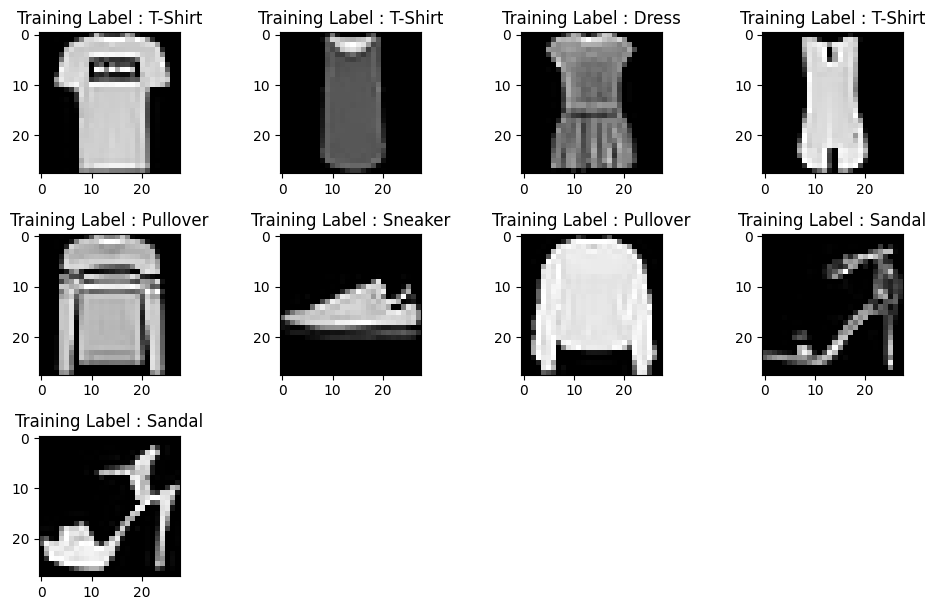

In [3]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

## Part a

In [4]:
input_size = 784
out_size = 10

In [5]:
## Define the model
################ Your code ############

hidden_size1 = 256
hidden_size2 = 128

model = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, out_size),
    nn.LogSoftmax(dim=1)
)
#######################################

In [6]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################

In [7]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  correct_train = 0
  total_train = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss = running_loss+loss.item()
    _, predicted = torch.max(output.data, 1)
    total_train += labels.size(0)
    correct_train += (predicted == labels).sum().item()
  else:
    train_accuracy = correct_train / total_train
    average_train_loss = running_loss / len(trainloader)
    print(f'Epoch {e+1}/{epochs}, Training Loss: {average_train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%')

Epoch 1/10, Training Loss: 0.8643, Training Accuracy: 72.00%
Epoch 2/10, Training Loss: 0.5090, Training Accuracy: 82.16%
Epoch 3/10, Training Loss: 0.4539, Training Accuracy: 83.99%
Epoch 4/10, Training Loss: 0.4203, Training Accuracy: 85.18%
Epoch 5/10, Training Loss: 0.3953, Training Accuracy: 86.08%
Epoch 6/10, Training Loss: 0.3776, Training Accuracy: 86.57%
Epoch 7/10, Training Loss: 0.3620, Training Accuracy: 87.09%
Epoch 8/10, Training Loss: 0.3506, Training Accuracy: 87.48%
Epoch 9/10, Training Loss: 0.3395, Training Accuracy: 87.85%
Epoch 10/10, Training Loss: 0.3289, Training Accuracy: 88.11%


Test Accuracy: 86.09%


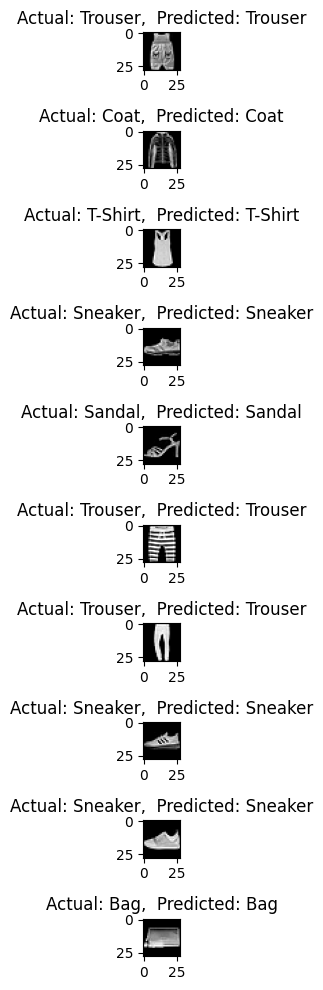

In [10]:
## Test your model
# !pip install d2l==0.17.0
# from d2l import torch as d2l
# d2l.predict_ch3(model,testloader,n = 10)
correct = 0
total = 0

# Set the model to evaluation mode
model.eval()

# Disable gradient computation during testing
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')
fig = plt.figure(figsize=(10,10))
with torch.no_grad():
    # Randomly select 10 images from the test set
    random_indices = np.random.choice(len(testloader.dataset), size=10, replace=False)

    for i, index in enumerate(random_indices):
        image, label = testloader.dataset[index]
        image = image.view(1, -1)  # Reshape to match the model's input size
        output = model(image)
        _, predicted = torch.max(output.data, 1)

        # Convert image tensor to a NumPy array for visualization
        image = image.view(28, 28).numpy()
        fig.add_subplot(10, 1, i+1)
        fig.tight_layout()
        plt.imshow(image, cmap='gray')
        plt.title(f'Actual: {labels_map[label]},  Predicted: {labels_map[predicted]}')

plt.show()

## Part b

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=32, bias=True)
  (7): ReLU()
  (8): Linear(in_features=32, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)
Epoch 1/40, Training Loss: 1.4792, Training Accuracy: 44.21%
Test Loss: 0.8719, Test Accuracy: 67.45%
Epoch 2/40, Training Loss: 0.6765, Training Accuracy: 75.29%
Test Loss: 0.7022, Test Accuracy: 74.77%
Epoch 3/40, Training Loss: 0.5271, Training Accuracy: 81.34%
Test Loss: 0.5200, Test Accuracy: 81.11%
Epoch 4/40, Training Loss: 0.4630, Training Accuracy: 83.71%
Test Loss: 0.4652, Test Accuracy: 83.10%
Epoch 5/40, Training Loss: 0.4233, Training Accuracy: 84.91%
Test Loss: 0.4410, Test Accuracy: 84.05%
Epoch 6/40, Training Loss: 0.3931, Training Accuracy: 85.89%
Test Loss: 0.4188, Test Accuracy: 85.00

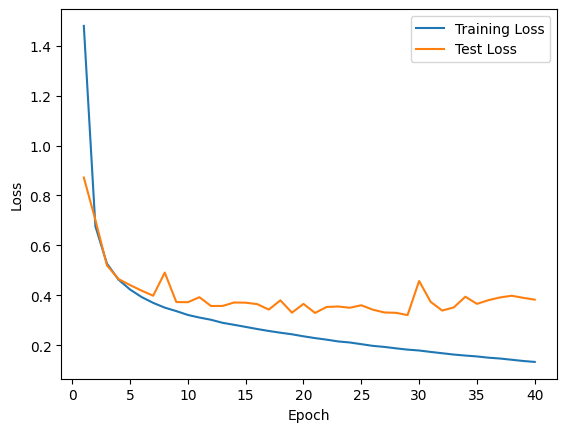

In [11]:
## Define the model
################ Your code ############

hidden_size1 = 512
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32

model = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, hidden_size3),
    nn.ReLU(),
    nn.Linear(hidden_size3, hidden_size4),
    nn.ReLU(),
    nn.Linear(hidden_size4, out_size),
    nn.LogSoftmax(dim=1)
)
#######################################
print(model)
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################
## Train your model
epochs = 40
train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_train_loss = running_loss / len(trainloader)
    train_losses.append(average_train_loss)

    # Evaluate on the test set
    model.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0

    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    average_test_loss = test_loss / len(testloader)
    test_losses.append(average_test_loss)

    model.train()

    # Print and plot results
    print(f'Epoch {e+1}/{epochs}, Training Loss: {average_train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%')
    print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

# Plot the training and test loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Part c

Epoch 1/40, Training Loss: 2.2483, Training Accuracy: 14.89%
Test Loss: 2.0452, Test Accuracy: 25.05%
Epoch 2/40, Training Loss: 1.5147, Training Accuracy: 39.77%
Test Loss: 1.2227, Test Accuracy: 44.47%
Epoch 3/40, Training Loss: 1.0720, Training Accuracy: 56.32%
Test Loss: 0.9875, Test Accuracy: 60.17%
Epoch 4/40, Training Loss: 0.8799, Training Accuracy: 65.52%
Test Loss: 0.8061, Test Accuracy: 69.46%
Epoch 5/40, Training Loss: 0.7618, Training Accuracy: 70.97%
Test Loss: 0.7067, Test Accuracy: 74.32%
Epoch 6/40, Training Loss: 0.6821, Training Accuracy: 74.59%
Test Loss: 0.6924, Test Accuracy: 74.13%
Epoch 7/40, Training Loss: 0.6272, Training Accuracy: 77.16%
Test Loss: 0.6706, Test Accuracy: 74.89%
Epoch 8/40, Training Loss: 0.5930, Training Accuracy: 78.37%
Test Loss: 0.5687, Test Accuracy: 79.83%
Epoch 9/40, Training Loss: 0.5648, Training Accuracy: 79.71%
Test Loss: 0.5937, Test Accuracy: 78.41%
Epoch 10/40, Training Loss: 0.5451, Training Accuracy: 80.18%
Test Loss: 0.5505, T

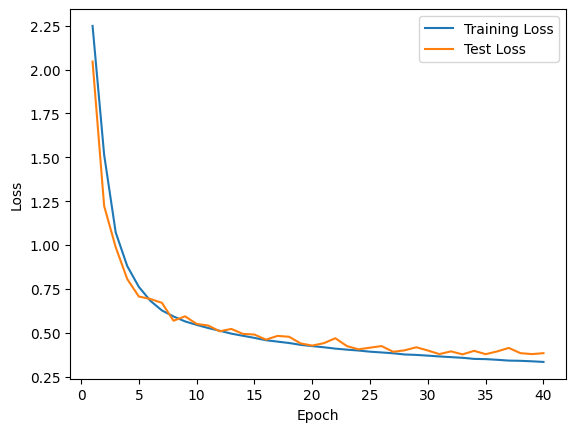

In [12]:
import torch.optim as optim
import torchvision.transforms as transforms

# Define data transformations for data augmentation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

# Update your data loaders with the new transformations
trainset_c = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset_c = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

trainloader_c = torch.utils.data.DataLoader(trainset_c, batch_size=64, shuffle=True)
testloader_c = torch.utils.data.DataLoader(testset_c, batch_size=64, shuffle=False)

DAmodel = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, hidden_size3),
    nn.ReLU(),
    nn.Linear(hidden_size3, hidden_size4),
    nn.ReLU(),
    nn.Linear(hidden_size4, out_size),
    nn.LogSoftmax(dim=1)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(DAmodel.parameters(), lr=0.01)

# Train your model with data augmentation
epochs = 40
train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader_c:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = DAmodel(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_train_loss = running_loss / len(trainloader_c)
    train_losses.append(average_train_loss)

    # Evaluate on the test set
    DAmodel.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0

    with torch.no_grad():
        for images, labels in testloader_c:
            images = images.view(images.shape[0], -1)
            outputs = DAmodel(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    average_test_loss = test_loss / len(testloader_c)
    test_losses.append(average_test_loss)

    DAmodel.train()

    # Print and plot results
    print(f'Epoch {e+1}/{epochs}, Training Loss: {average_train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%')
    print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

# Plot the training and test loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/40, Training Loss: 1.4979, Training Accuracy: 46.52%
Test Loss: 0.8540, Test Accuracy: 65.31%
Epoch 2/40, Training Loss: 0.7174, Training Accuracy: 73.27%
Test Loss: 0.6521, Test Accuracy: 75.69%
Epoch 3/40, Training Loss: 0.5735, Training Accuracy: 79.89%
Test Loss: 0.5515, Test Accuracy: 80.50%
Epoch 4/40, Training Loss: 0.5116, Training Accuracy: 82.17%
Test Loss: 0.5192, Test Accuracy: 81.81%
Epoch 5/40, Training Loss: 0.4741, Training Accuracy: 83.37%
Test Loss: 0.5353, Test Accuracy: 79.89%
Epoch 6/40, Training Loss: 0.4437, Training Accuracy: 84.48%
Test Loss: 0.4842, Test Accuracy: 82.91%
Epoch 7/40, Training Loss: 0.4244, Training Accuracy: 85.17%
Test Loss: 0.4445, Test Accuracy: 84.56%
Epoch 8/40, Training Loss: 0.4082, Training Accuracy: 85.80%
Test Loss: 0.4349, Test Accuracy: 84.82%
Epoch 9/40, Training Loss: 0.3964, Training Accuracy: 86.20%
Test Loss: 0.4297, Test Accuracy: 85.03%
Epoch 10/40, Training Loss: 0.3862, Training Accuracy: 86.54%
Test Loss: 0.4613, T

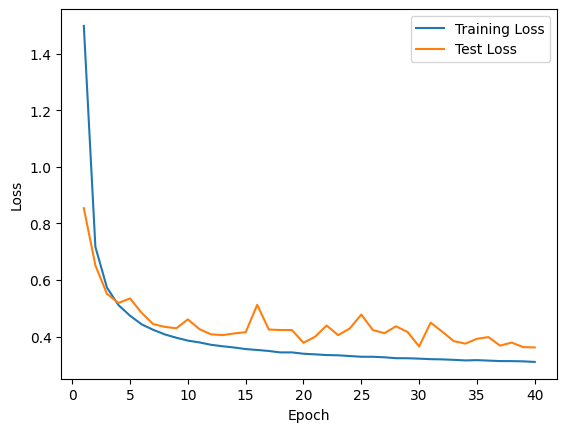

In [14]:
## Define the model
################ Your code ############

hidden_size1 = 512
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32

modelL2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Linear(hidden_size2, hidden_size3),
    nn.ReLU(),
    nn.Linear(hidden_size3, hidden_size4),
    nn.ReLU(),
    nn.Linear(hidden_size4, out_size),
    nn.LogSoftmax(dim=1)
)
#######################################
criterion = nn.CrossEntropyLoss()
# Define the optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(modelL2.parameters(), lr=0.01, weight_decay=0.01)
#######################################
## Train your model
epochs = 40
train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0

    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = modelL2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_train_loss = running_loss / len(trainloader)
    train_losses.append(average_train_loss)

    # Evaluate on the test set
    modelL2.eval()
    correct_test = 0
    total_test = 0
    test_loss = 0

    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            outputs = modelL2(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    average_test_loss = test_loss / len(testloader)
    test_losses.append(average_test_loss)

    modelL2.train()

    # Print and plot results
    print(f'Epoch {e+1}/{epochs}, Training Loss: {average_train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%')
    print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

# Plot the training and test loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/40, Training Loss: 2.0941, Training Accuracy: 21.84%
Test Loss: 1.5008, Test Accuracy: 42.68%
Epoch 2/40, Training Loss: 1.4237, Training Accuracy: 40.84%
Test Loss: 1.0424, Test Accuracy: 58.45%
Epoch 3/40, Training Loss: 1.1732, Training Accuracy: 51.45%
Test Loss: 0.9025, Test Accuracy: 62.07%
Epoch 4/40, Training Loss: 1.0601, Training Accuracy: 57.03%
Test Loss: 0.8348, Test Accuracy: 66.43%
Epoch 5/40, Training Loss: 0.9902, Training Accuracy: 60.49%
Test Loss: 0.7800, Test Accuracy: 67.61%
Epoch 6/40, Training Loss: 0.9424, Training Accuracy: 62.89%
Test Loss: 0.7517, Test Accuracy: 68.52%
Epoch 7/40, Training Loss: 0.9032, Training Accuracy: 64.49%
Test Loss: 0.7257, Test Accuracy: 70.53%
Epoch 8/40, Training Loss: 0.8732, Training Accuracy: 66.04%
Test Loss: 0.7018, Test Accuracy: 71.08%
Epoch 9/40, Training Loss: 0.8519, Training Accuracy: 66.74%
Test Loss: 0.6846, Test Accuracy: 72.70%
Epoch 10/40, Training Loss: 0.8326, Training Accuracy: 67.73%
Test Loss: 0.6746, T

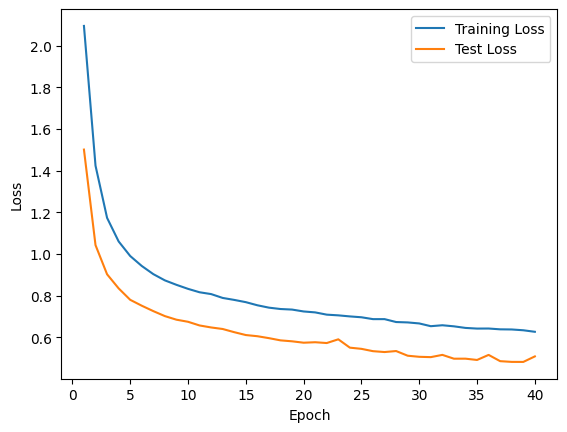

In [16]:
transform_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

transform_normalize = transforms.Compose([
    transforms.ToTensor(),
])

batch_size = 64  # Adjust the batch size as needed
trainset_d = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform_augment)
testset_d = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform_normalize)

trainloader_d = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader_d = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)


hidden_size1 = 512
hidden_size2 = 128
hidden_size3 = 64
hidden_size4 = 32
dropout_prob = 0.5

model_combined = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(hidden_size1, hidden_size2),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(hidden_size2, hidden_size3),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(hidden_size3, hidden_size4),
    nn.ReLU(),
    nn.Dropout(dropout_prob),
    nn.Linear(hidden_size4, out_size),
    nn.LogSoftmax(dim=1)
)
#######################################
criterion = nn.CrossEntropyLoss()
# Define the optimizer with L2 regularization (weight decay)
optimizer = optim.SGD(model_combined.parameters(), lr=0.01, weight_decay=0.01)
# Train your model
epochs = 40
train_losses = []
test_losses = []

for e in range(epochs):
    running_loss = 0
    correct_train = 0
    total_train = 0

    model_combined.train()  # Set the model to training mode

    for images, labels in trainloader_d:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        outputs = model_combined(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    average_train_loss = running_loss / len(trainloader_d)
    train_losses.append(average_train_loss)

    # Evaluate on the test set
    model_combined.eval()  # Set the model to evaluation mode
    correct_test = 0
    total_test = 0
    test_loss = 0

    with torch.no_grad():
        for images, labels in testloader_d:
            images = images.view(images.shape[0], -1)
            outputs = model_combined(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = correct_test / total_test
    average_test_loss = test_loss / len(testloader_d)
    test_losses.append(average_test_loss)

    # Print and plot results
    print(f'Epoch {e+1}/{epochs}, Training Loss: {average_train_loss:.4f}, Training Accuracy: {100 * train_accuracy:.2f}%')
    print(f'Test Loss: {average_test_loss:.4f}, Test Accuracy: {100 * test_accuracy:.2f}%')

# Plot the training and test loss
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()